# Creating a wildtype (WT / PD0), and Parkinson degeneration (PD2) network

In the directory ```network_path``` we have three sub directories ```PD0```, ```PD2-ref``` and ```PD2```. In order to generate the ```PD2``` network, we degenerate the ```PD0``` network by swapping the WT morphologies for the PD2 morphologies. In addition a subset of the synapses in the ```PD2-ref``` network are added to compensate for differences in pruning.

We need to specify a ```connection_override``` file. The difference compared to the standard connection file is that it contains ```recovery``` information, i.e. the fraction of synapses from the ```PD2-ref``` network that should be added to the ```PD2``` network.

The ```rc``` object is a ```ipyparallel``` ```RemoteClient``` object for parallel execution.

If you want to remap external input that was removed to a new position, then use ```remap_removed_input = True```

In [1]:
import os

network_path = os.path.join("networks","PD-example-2")
#network_path = os.path.join("networks","PD-example-2_ref_0.9")

network_path_pd0 = os.path.join(network_path, "PD0")
network_path_pd2_ref = os.path.join(network_path, "PD2-ref")
network_path_pd2 = os.path.join(network_path, "PD2")

network_size = 200
input_config = "test-input.json"  # Only background input will be used in this example

snudda_data_base_path = os.path.join("..", "..", "..", "..", "BasalGangliaData", "Parkinson", "20220225")
snudda_data_pd0 = os.path.join(snudda_data_base_path, "PD0")
snudda_data_pd2 = os.path.join(snudda_data_base_path, "PD2")

network_config_pd0 = os.path.join(snudda_data_base_path, "connectivity", "network-config.json")
network_config_pd2 = os.path.join(snudda_data_base_path, "connectivity", "network-config-PD-synapse-recovery.json")

input_pd0 = os.path.join(network_path_pd0, "input-spikes.hdf5")
input_pd2 = os.path.join(network_path_pd2, "input-spikes.hdf5")

# Do we want to remap removed input?
remap_removed_input = False
remapped_fraction = 0.0

# Do we want to remap removed input?
#remap_removed_input = True
#remapped_fraction = 0.9

rc = None

## First generate the WT reference network

In [2]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd0, random_seed=123456, snudda_data=snudda_data_pd0,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd0)

Adding Striatum with 200 neurons
Using cube for striatum
Neurons for striatum read from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum
Adding neurons: FS from dir /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD0/neurons/striatum/fs/3

In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd0, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json


In [4]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd0, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/180 (200 neurons)
Processing hyper voxel : 66/180 (190 neurons)
Processing hyper voxel : 41/180 (189 neurons)
Processing hyper voxel : 37/180 (156 neurons)
Processing hyper voxel : 71/180 (145 neurons)
Processing hyper voxel : 35/180 (127 neurons)
Processing hyper voxel : 67/180 (102 neurons)
Processing hyper voxel : 42/180 (93 neurons)
Processing hyper voxel : 31/180 (81 neurons)
Processing hyper voxel : 6/180 (81 neurons)
Processing hyper voxel : 65/180 (72 neurons)
Processing hyper voxel : 40/180 (68 neurons)
Processing hyper voxel : 72/180 (54 neurons)
Processing hyper voxel : 11/180 (50 neurons)
Processing hyper voxel : 61/180 (49 neurons)
Processing hyper voxel : 70/180 (30 neurons)
Processing hyper voxel : 5/180 (26 neurons)
Processing hyper voxel : 32/180 (25 neurons)
Proc

In [5]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd0, rc=rc)
sp.prune()

No file networks/PD-example-2/PD0/pruning_merge_info.json
Read 448670 out of total 448670 synapses
Read 5 out of total 5 gapJunctions


In [6]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path_pd0, 
                 input_config_file=input_config,
                 verbose=False)
si.generate()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
Writing spikes to networks/PD-example-2/PD0/input-spikes.hdf5


## Generate a PD2 reference network

This network will not have the same synapses as the WT, but it is used in order to add "recovery synapses" to compensate for part of the degeneration.

In [7]:
from snudda import SnuddaInit

si = SnuddaInit(network_path=network_path_pd2_ref, random_seed=123456, snudda_data=snudda_data_pd2,
                struct_def={"Striatum": network_size}, connection_override_file=network_config_pd2)

Adding Striatum with 200 neurons
Using cube for striatum
Neurons for striatum read from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum
Adding neurons: FS from dir /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs
No parameter.json file.
No parameter.json file.
No parameter.json file.
No parameter.json file.
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/0/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/parameters.json
Mechanism file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/1/mechanisms.json
Parameter file not found: /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD3/neurons/striatum/fs/3

In [8]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path_pd2_ref, verbose=False, rc=rc)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2/PD2-ref/network-config.json


In [9]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path_pd2_ref, rc=rc)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2/PD2-ref/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 36/180 (200 neurons)
Processing hyper voxel : 41/180 (198 neurons)
Processing hyper voxel : 66/180 (176 neurons)
Processing hyper voxel : 71/180 (157 neurons)
Processing hyper voxel : 37/180 (150 neurons)
Processing hyper voxel : 42/180 (125 neurons)
Processing hyper voxel : 67/180 (91 neurons)
Processing hyper voxel : 35/180 (87 neurons)
Processing hyper voxel : 72/180 (73 neurons)
Processing hyper voxel : 40/180 (73 neurons)
Processing hyper voxel : 6/180 (69 neurons)
Processing hyper voxel : 11/180 (59 neurons)
Processing hyper voxel : 65/180 (41 neurons)
Processing hyper voxel : 31/180 (38 neurons)
Processing hyper voxel : 70/180 (32 neurons)
Processing hyper voxel : 7/180 (26 neurons)
Processing hyper voxel : 12/180 (22 neurons)
Processing hyper voxel : 61/180 (20 neurons)
P

In [10]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path_pd2_ref, rc=rc)
sp.prune()

No file networks/PD-example-2/PD2-ref/pruning_merge_info.json
Read 280756 out of total 280756 synapses
Read 5 out of total 5 gapJunctions


## Degenerating the PD0 network to get PD2 network

In [11]:
network_file_pd0 = os.path.join(network_path_pd0, "network-synapses.hdf5")
network_file_pd2_ref = os.path.join(network_path_pd2_ref, "network-synapses.hdf5")
network_file_pd2 = os.path.join(network_path_pd2, "network-synapses.hdf5")

from snudda.utils.swap_to_degenerated_morphologies_extended import SwapToDegeneratedMorphologiesExtended
swap = SwapToDegeneratedMorphologiesExtended(original_network_file=network_file_pd0,
                                             updated_network_file=network_file_pd2_ref,
                                             output_network_file=network_file_pd2,
                                             original_snudda_data_dir=snudda_data_pd0,
                                             updated_snudda_data_dir=snudda_data_pd2,
                                             original_input_file=input_pd0,
                                             output_input_file=input_pd2)
swap.write_new_network_file()
swap.write_new_input_file(remap_removed_input=remap_removed_input, remapped_fraction=remapped_fraction)
swap.close()

Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/1/DR-rat-Mar-13-08-1-536-R-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/chin/str-chin-e170614_cell6-m17JUL301751_170614_no6_MD_cell_1_x63-v20190710/optim_chin_morph_renamed2019-11-08.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/3/MTC251001A-IDB-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/fs/0/BE104E-cor-rep-res3-61.swc-cache.pickle
Failed to load cache from /home/ilaria/SSH_GitHub/BasalGangliaData/Parkinson/20220225/PD2/neurons/striatum/lts/8/lts_morp_9862_centered_no_axon_resampled-var8.swc-cache.pickle
Writing new network to networks/PD-example-2/PD2/network-synapses.hdf5
Loading synapses into memory.
Failed

Processed input to dSPN_33 (166), keeping 102 out of 200 inputs (plus remapping 0 inputs)(51.00 %) (0.00 % remapped)
Processed input to dSPN_31 (167), keeping 109 out of 200 inputs (plus remapping 0 inputs)(54.50 %) (0.00 % remapped)
Processed input to dSPN_16 (168), keeping 114 out of 200 inputs (plus remapping 0 inputs)(57.00 %) (0.00 % remapped)
Processed input to dSPN_30 (169), keeping 60 out of 200 inputs (plus remapping 0 inputs)(30.00 %) (0.00 % remapped)
Processed input to iSPN_33 (17), keeping 132 out of 200 inputs (plus remapping 0 inputs)(66.00 %) (0.00 % remapped)
Processed input to dSPN_2 (170), keeping 100 out of 200 inputs (plus remapping 0 inputs)(50.00 %) (0.00 % remapped)
Processed input to dSPN_16 (171), keeping 119 out of 200 inputs (plus remapping 0 inputs)(59.50 %) (0.00 % remapped)
Processed input to dSPN_29 (172), keeping 62 out of 200 inputs (plus remapping 0 inputs)(31.00 %) (0.00 % remapped)
Processed input to LTS_8 (173), keeping 0 out of 0 inputs (plus rema

Processed input to dSPN_24 (57), keeping 128 out of 200 inputs (plus remapping 0 inputs)(64.00 %) (0.00 % remapped)
Processed input to dSPN_3 (58), keeping 86 out of 200 inputs (plus remapping 0 inputs)(43.00 %) (0.00 % remapped)
Processed input to dSPN_11 (59), keeping 107 out of 200 inputs (plus remapping 0 inputs)(53.50 %) (0.00 % remapped)
Processed input to iSPN_34 (6), keeping 70 out of 200 inputs (plus remapping 0 inputs)(35.00 %) (0.00 % remapped)
Processed input to iSPN_0 (60), keeping 117 out of 200 inputs (plus remapping 0 inputs)(58.50 %) (0.00 % remapped)
Processed input to iSPN_24 (61), keeping 130 out of 200 inputs (plus remapping 0 inputs)(65.00 %) (0.00 % remapped)
Processed input to iSPN_27 (62), keeping 98 out of 200 inputs (plus remapping 0 inputs)(49.00 %) (0.00 % remapped)
Processed input to dSPN_34 (63), keeping 48 out of 200 inputs (plus remapping 0 inputs)(24.00 %) (0.00 % remapped)
Processed input to iSPN_22 (64), keeping 118 out of 200 inputs (plus remapping 

## Plotting of a degenerated neuron

In [12]:
neuron_id = 55

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
Plotting 200 external synapses
Plotting 200 external synapses
Figure written: networks/PD-example-2/PD0/figures/input-to-55-iSPN_10-and-internal-synapses.png


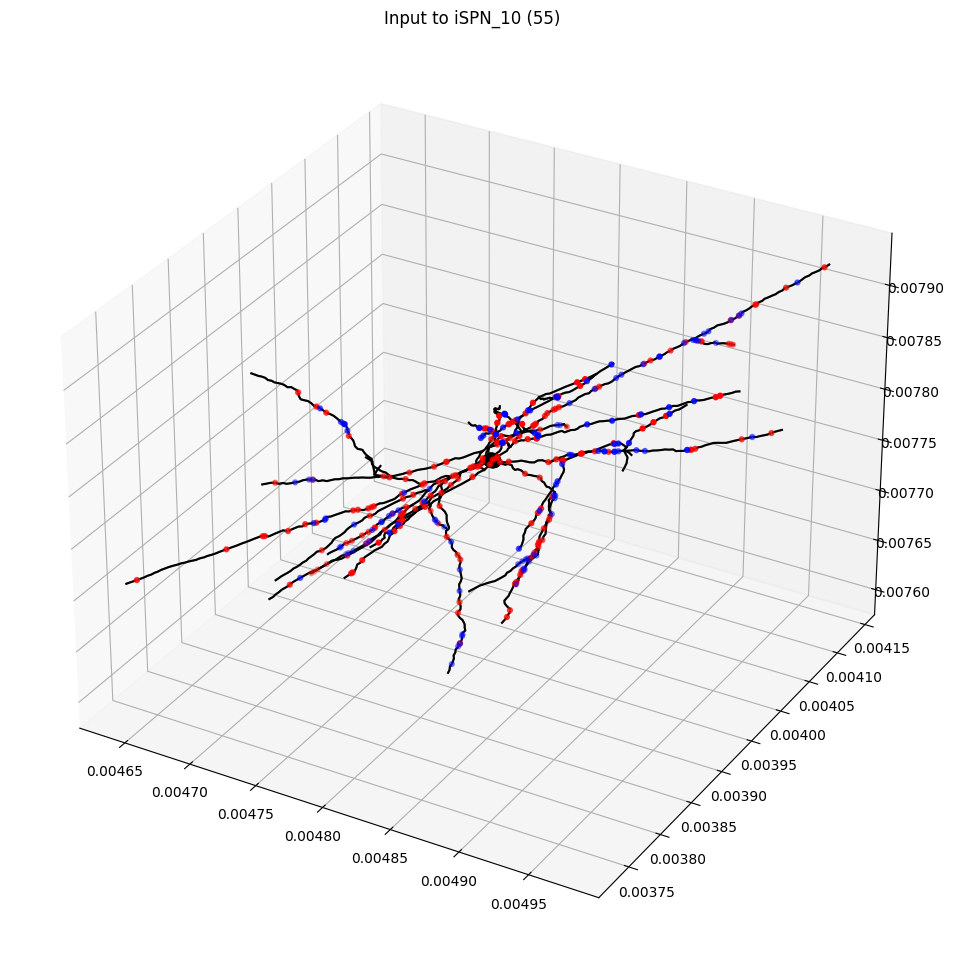

In [13]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd0)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True)
#internal synapses are blue
#external synapses are red

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2/PD2/network-synapses.hdf5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Plotting 200 external synapses
Plotting 130 external synapses
Figure written: networks/PD-example-2/PD2/figures/input-to-55-iSPN_10-and-internal-synapses.png


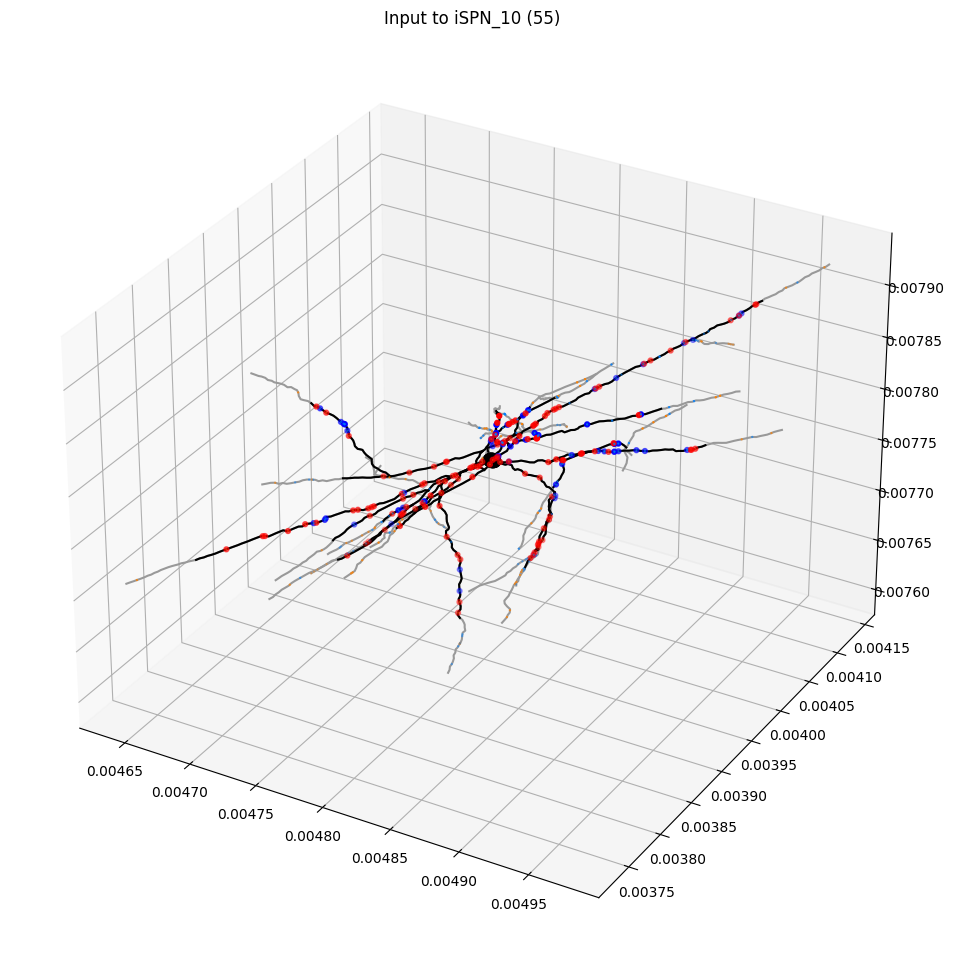

In [14]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2)

pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True)

Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD0 from networks/PD-example-2/PD0/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/Parkinson/20220225/PD2 from networks/PD-example-2/PD2-ref/network-config.json


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Plotting 200 external synapses
Figure written: networks/PD-example-2/PD2-ref/figures/input-to-55-iSPN_10-and-internal-synapses.png


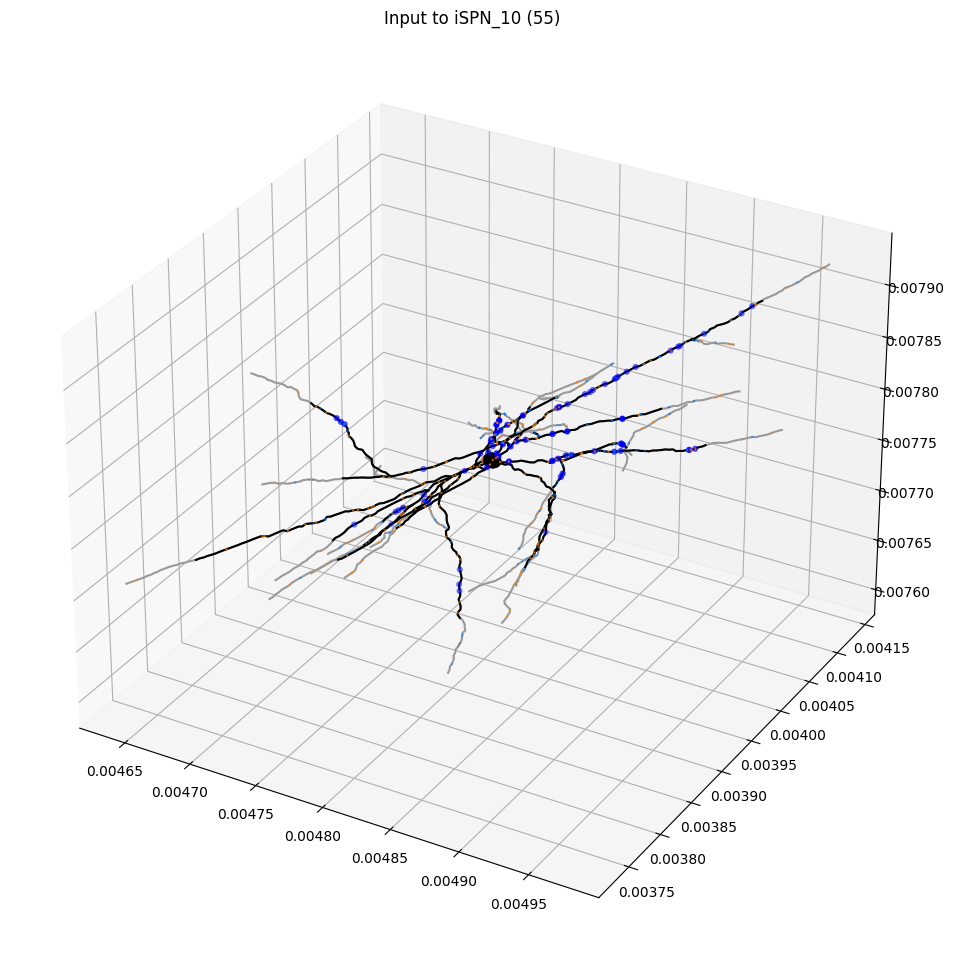

In [15]:
%matplotlib inline
from snudda.plotting.plot_degeneration import PlotDegeneration

pd = PlotDegeneration(original_network_path=network_path_pd0,
                      degenerated_network_path=network_path_pd2_ref)
neuron_id = 55
pd.plot_neuron(neuron_id=neuron_id, figure_size=(12,12), 
               show_internal_synapses=True)

In [16]:
from snudda.analyse.analyse_input import AnalyseInput

pd0_input_info = AnalyseInput(input_file=input_pd0, network_path=network_path_pd0)
pd2_input_info = AnalyseInput(input_file=input_pd2, network_path=network_path_pd2)

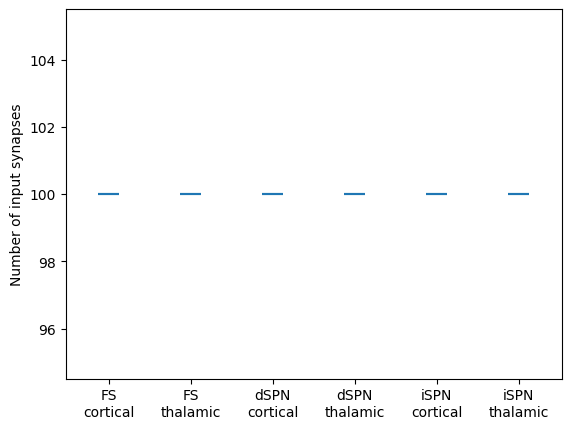

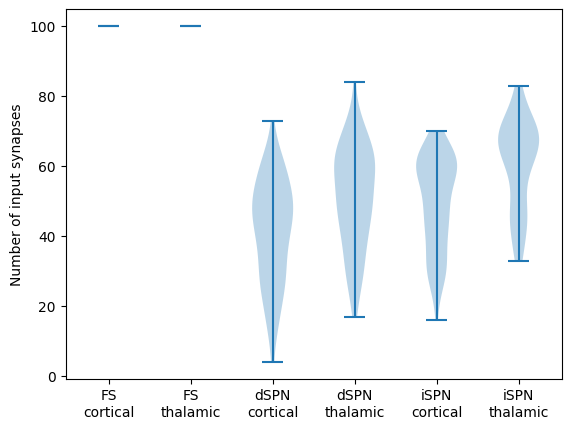

In [17]:
pd0_input_info.plot_input_count("PD0-input_example.png")
pd2_input_info.plot_input_count("PD2-input_example.png")

In [18]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --countSyn"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --countSyn"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --countSyn"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 200 neurons with 21326 synapses and 3 gap junctions
Load done. 0.0
ChIN -> dSPN: 197 synapses
ChIN -> iSPN: 91 synapses
FS -> FS: 5 synapses
FS -> dSPN: 786 synapses
FS -> iSPN: 501 synapses
LTS -> ChIN: 6 synapses
LTS -> dSPN: 5 synapses
dSPN -> ChIN: 12 synapses
dSPN -> dSPN: 4559 synapses
dSPN -> iSPN: 1050 synapses
iSPN -> ChIN: 8 synapses
iSPN -> dSPN: 5079 synapses
iSPN -> iSPN: 9027 synapses

PD2
Loading networks/PD-example-2/PD2/network-synapses.hdf5
Loading config data from HDF5
Loading 200 neurons with 9476 synapses and 3 gap junctions
Load done. 0.0
ChIN -> dSPN: 87 synapses
ChIN -> iSPN: 22 synapses
FS -> FS: 6 synapses
FS -> dSPN: 704 synapses
FS -> iSPN: 1075 synapses
LTS -> ChIN: 6 synapses
dSPN -> ChIN: 12 synapses
dSPN -> dSPN: 1371 synapses
dSPN -> iSPN: 403 synapses
iSPN -> ChIN: 9 synapses
iSPN -> dSPN: 1641 synapses
iSPN -> iSPN: 4140 synapses

PD2 degenerated
Loading n

0

In [19]:
cmd_str1 = f"snudda_load {network_path_pd0}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str2 = f"snudda_load {network_path_pd2}/network-synapses.hdf5 --listPre {neuron_id}"
cmd_str3 = f"snudda_load {network_path_pd2_ref}/network-synapses.hdf5 --listPre {neuron_id}"

print("WT")
os.system(cmd_str1)
print("\nPD2")
os.system(cmd_str2)
print("\nPD2 degenerated")
os.system(cmd_str3)

WT
Loading networks/PD-example-2/PD0/network-synapses.hdf5
Loading config data from HDF5
Loading 200 neurons with 21326 synapses and 3 gap junctions
Load done. 0.0
List neurons pre-synaptic to neuronID = 55 (iSPN_10)
The neuron receives 131 synapses
1 : dSPN_17 (3 synapses)
2 : iSPN_3 (5 synapses)
12 : iSPN_21 (4 synapses)
23 : iSPN_28 (3 synapses)
28 : iSPN_35 (4 synapses)
29 : dSPN_24 (3 synapses)
35 : dSPN_35 (2 synapses)
41 : dSPN_4 (3 synapses)
47 : iSPN_12 (3 synapses)
54 : iSPN_30 (4 synapses)
57 : dSPN_24 (2 synapses)
60 : iSPN_0 (4 synapses)
61 : iSPN_24 (4 synapses)
62 : iSPN_27 (3 synapses)
73 : iSPN_18 (6 synapses)
82 : iSPN_13 (4 synapses)
94 : iSPN_15 (3 synapses)
98 : iSPN_10 (3 synapses)
104 : iSPN_35 (2 synapses)
107 : iSPN_0 (3 synapses)
108 : iSPN_31 (3 synapses)
115 : iSPN_5 (3 synapses)
116 : iSPN_1 (3 synapses)
132 : iSPN_14 (8 synapses)
142 : iSPN_9 (5 synapses)
144 : dSPN_22 (3 synapses)
145 : iSPN_14 (3 synapses)
153 : iSPN_30 (3 synapses)
157 : dSPN_20 (2 syna

0

Added: 16, removed: 78, kept: 43


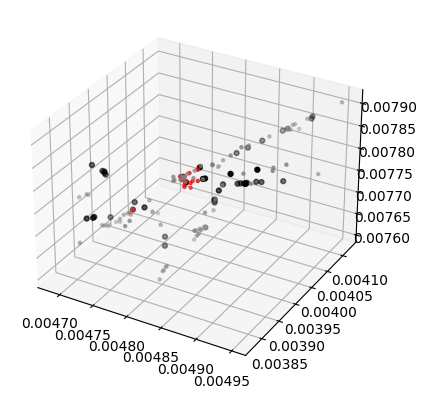

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [20]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2, 
                                neuron_id=neuron_id)
pdg.plot_synapses()

Added: 60, removed: 109, kept: 12


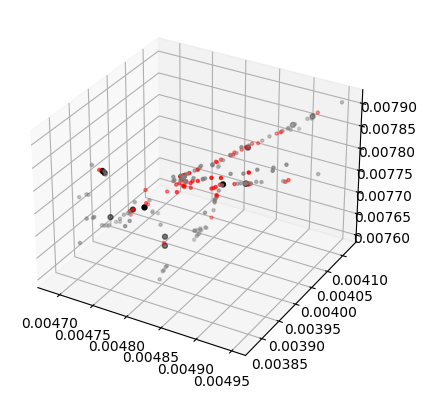

(<Figure size 640x480 with 1 Axes>, <Axes3DSubplot:>)

In [21]:
from snudda.plotting.plot_degeneration_and_growth import PlotDegenerationAndGrowth
pdg = PlotDegenerationAndGrowth(original_network_path=network_path_pd0, 
                                degenerated_network_path=network_path_pd2_ref, 
                                neuron_id=neuron_id)
pdg.plot_synapses()